# Pneumonia Detection on Chest X-Ray with Deep Learning

## Contents

[About the Project](#About-the-Project)

[What is Pneumonia](#What-is-Pneumonia)

[Import Libraries](#Import-Libraries)

[Description of the Dataset](#Description-of-the-Dataset)

[Loading the Dataset](#Loading-the-Dataset)

[Image Augmentation](#Image-Augmentation)

[Training the Model](#Training-the-Model)

[Model Prediction & Evaulation](#Model-Prediction-&-Evaulation)

[Conclusion & Findings](#Conclusion-&-Findings)

[Future Directions](#Future-Directions)

## About the Project

The goal of this project is to detect the presence of Pneumonia on Chest-X-rays using Deep Learning Technology. And to evaluate how well the model performs in achieving the objective. According to the [CDC](https://www.cdc.gov/pneumonia/prevention.html), Pneumonia was responsible for the deaths of 47,601 people in the U.S in 2020. Globally, it killed more than 740,000 children younger than 5 years old in 2019 and November 12 is observed as World Pneumonia Day to raise global awareness of the disease[(CDC)](https://www.cdc.gov/pneumonia/prevention.html). [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310039401) identified Pneumonia as the cause of death for 5,931 people and ranked it 8 as a leading cause of death. 
This project aims to reduce the mortality associated with Pneumonia by applying Deep Learning to detect the presence of Pneumonia on X-ray images.                      


## What is Pneumonia

Pneumonia is an infection that inflames the lungs, the air sacs in the lungs may become filled with pus or fluid causing cough, fever and breathing difficulties. Viruses, bacteria, and fungi can cause Pneumonia. 
It can range in severity from mild to life-threatening. It is most serious for adults 65 years and older, children younger than 5 years old, people who have ongoing medical conditions and people who smoke.

Pneumonia can be detected through Blood tests, Chest X-ray, Pulse oximetry and Sputum test. Chest X-rays are currently the best available method for diagnosing pneumonia. Still, detecting pneumonia in chest X-rays is a challenging task that relies on the availability of expert radiologists, though it can still be difficult for radiologists [(Rajpurkar, et al. 2017)](https://arxiv.org/abs/1711.05225). 

This present a challenge that interests the world of Data science and Machine Learning. The problem is a classification one, and Machine Learning can be deployed to solve it. Chest X-ray imaging technology was widely used for the early detection of COVID-19 pneumonia and deep learning methods have recently shown remarkable results in detecting COVID-19 on chest X-rays [(Elgendi, et al., 2021)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7956964/). Also research has shown that in the case of COCID-19 detection, the combination of deep learning and chest X-rays could be faster and less expensive than polymerase chain reaction (PCR), the current gold standard for COVID-19 detection [(Elgendi, et al., 2021)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7956964/).


## Import Libraries 

In [1]:
import numpy as np # for linear algebra
import pandas as pd
import os
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
%matplotlib inline 
import tensorflow as tf
# Deep learning Libraries 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Description of the Dataset

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

The description of the dataset as well as the dataset was gotten from:[Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

Breakdown of the original dataset from Kaggle

![image info](./original_summary_of_dataset.png)

The files contained in the original dataset had too few images for validation, so some images were transfered to the validation folder from both the test and train set. Since a model would be built from scratch there is no fear that the model has previously seen the data. Also, evidence was not found that this particular set of images were used to pre-train any model. This is important should a pre-trained model be used to compare with the model built from scratch.

The updated dataset has 82% of data in the train set

![image info](./updated_summary_of_dataset.png)

To further have a visual apprecuation of the train dataset, it was loaded into memory to plot in a bar chart. Modelling would not be done from memory, an image data generator would be used to feed the images into the model for training

In [80]:
#loading data into memory
labels = ['NORMAL', 'PNEUMONIA']
img_size = 150

def get_training_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #Open the image
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshape images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [81]:
# Path of the train data
train = get_training_images("chest_xray/train")

OpenCV(4.5.5) /Users/runner/miniforge3/conda-bld/libopencv_1646358502422/work/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.5) /Users/runner/miniforge3/conda-bld/libopencv_1646358502422/work/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/var/folders/06/jpcl7m5x7_z2sy6xv7tf000c0000gn/T/ipykernel_4034/1276480203.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


/Applications/anaconda3/envs/deeplearning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


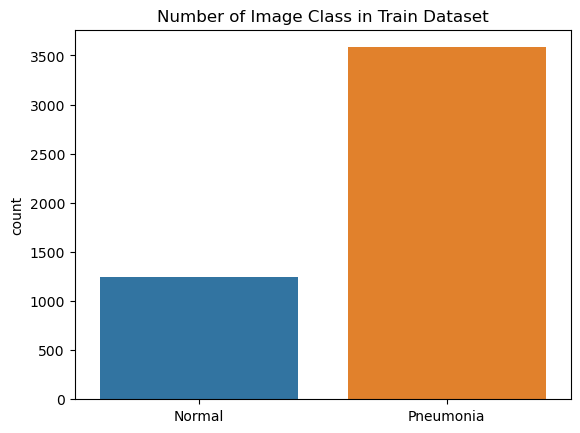

In [82]:
im = []
for i in train:
    if(i[1] == 0):
        im.append("Normal")
    else:
        im.append("Pneumonia")
plt.title("Number of Image Class in Train Dataset")
sns.countplot(im) 
plt.show()

The dataset that would be used to train the model is imbalanced this can cause bias in the model resulting in wrong prediction. Also, data imbalance can cause the model to overfit. 

Data augmentation is a preprocessing technique that introduces noise to the images by applying distortions. Augmentation also generates similar images to the train set and applies the distortions to them. This helps in increasing the datasize thereby reducing overfitting and improving model results. Data augmentation would be applied to solve the problem of imbalance and overfitting.

## Loading the Dataset

To process the data for modelling, the **ImageDataGenerator** class from the Keras and TensorFlow library would be used. It sort of forms a tunnel between the directory(where images are stored) and the model. As images are pulled from the directory in batches, real-time augmentation is applied. This frees-up memory space because data is not loaded on to the computer memory.



In [286]:
# desired image dimensions, the images would be reshaped to 150 x 150
height = 150
width = 150

# Create train image data generator to load train images.
train_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_generator = train_datagen.flow_from_directory("chest_xray/train", target_size=(height, width),
                                                    batch_size=1, class_mode = "binary")

# Create validation image data generator
# Only rescaling is applied to the validation data to normalize it
val_datagen = ImageDataGenerator(rescale=1.0 / 255) 


# Location where validation & test images should be loaded from is specified
val_generator = val_datagen.flow_from_directory("chest_xray/val", target_size=(height, width),
                                                batch_size=30, class_mode = "binary", color_mode="grayscale",
                                               shuffle=True, seed=10)

test_generator = val_datagen.flow_from_directory("chest_xray/test",target_size=(height,width),
                                                batch_size=30, class_mode = "binary", color_mode="grayscale",
                                                shuffle=False, seed=10)


Found 4832 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


The following preprocessing techniques was carried out on the images
1. Normalization: All images were rescaled(normalized) to be between 0-1. This makes it easy to be processed by the model


2. Image Standardization (Rescale): It is best practice to ensure that all images fed into the model are of the same size


3. class_mode: Class mode is set to binary because we have two classes, if we had multiple classes it would be set to categorical


4. batch_size: This means that each of the validation and test datasets of images are divided into groups of 30 images that will then be scaled and fed into the model. The batch size for train was set to 4 because for now, I'm interested in viewing it


5. Grayscale conversion (color_mode): The color mode is set to rgb for colored images else grayscale if the images are black and white


6. shuffle: It is turned on for train and validation but turned off for test. It is turned on to pass the samples in different order during training to make the model more robust to overfitting. It is not required in validation since no training is taking place, however some ML practitioners suggest it. 

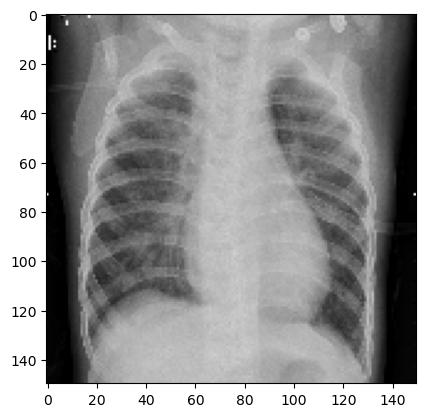

1.0


In [287]:
# read images from generator in batches, four in this case, and show them
for img_batch in train_generator:
    images = img_batch[0]
    labels = img_batch[1]
    for i in range(len(labels)):
        # Matches an image to its corresponding label
        plt.imshow(images[i])
        plt.show()
        print(labels[i])
    #break is added to read just a single batch    
    break

Images without augmentation is loaded using **ImageDataGenerator** random Normal and Pneumonia images are displayed

Normal = Class 0

Pneumonia = Class 1

## Image Augmentation

The data augmentation steps used in this project was adopted from a paper by [(Elgendi, et al., 2021)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7956964/). The objective of their paper was to understand the impact of data augnmentation and to know which method is mofre useful than the other[(Elgendi, et al., 2021)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7956964/).

The method judged to be the best of all the methods they tried is what I've used. Although they concluded that the dataset with no augmentation performed better than those that had augmentation applied.

In [85]:
augmented_train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [86]:
augmented_train_generator = augmented_train_datagen.flow_from_directory("chest_xray/train",
                                                    target_size=(150, 150),
                                                    batch_size=32, class_mode = "binary", color_mode="grayscale",
                                                    shuffle=True, seed=10)

Found 4832 images belonging to 2 classes.


The data set is shuffled to reduce variance and overfitting

### Visualizing augmented image 

0.0


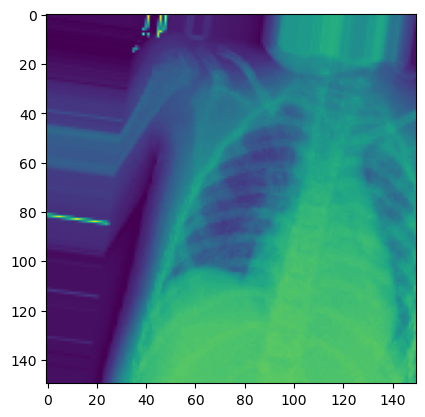

1.0


1.0


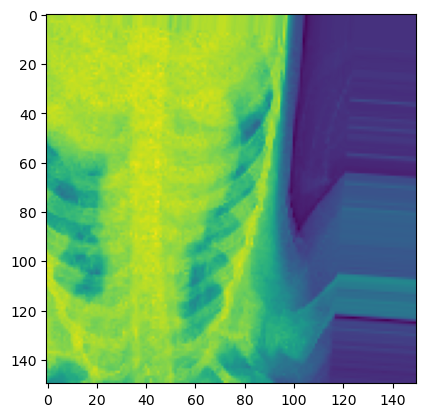

1.0


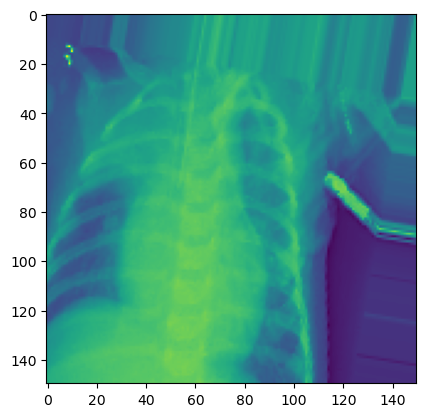

1.0


1.0


0.0


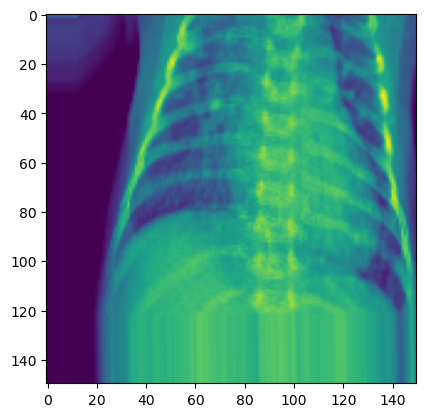

1.0


0.0


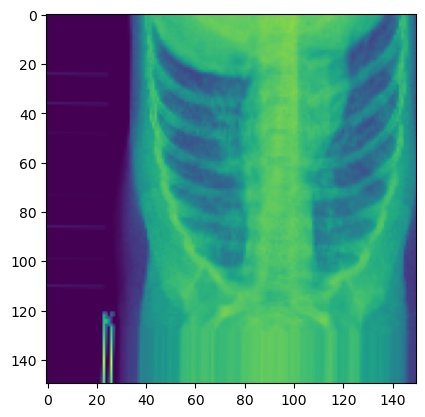

1.0


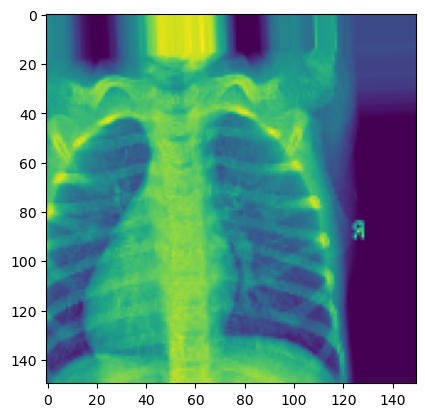

0.0


0.0


1.0


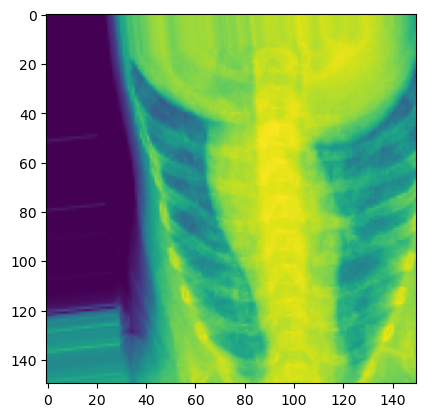

1.0


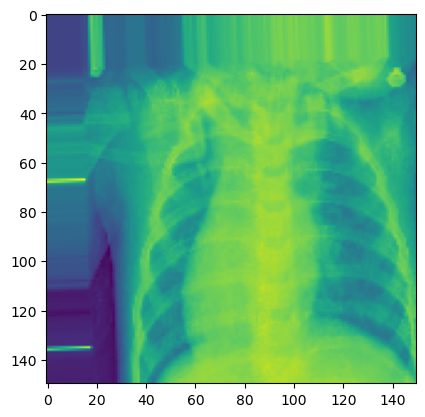

1.0


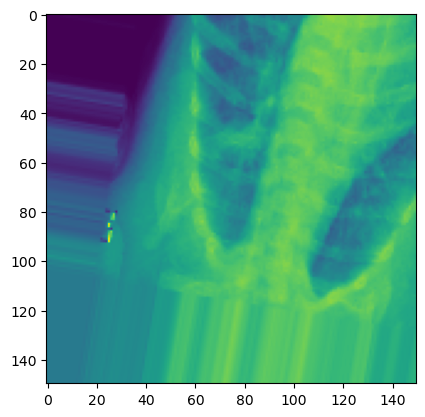

1.0


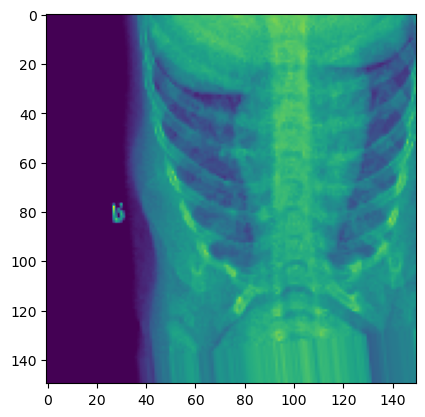

0.0


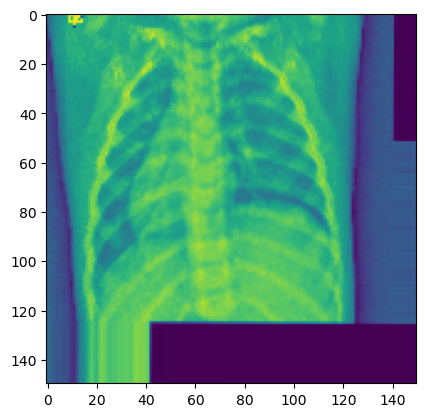

0.0


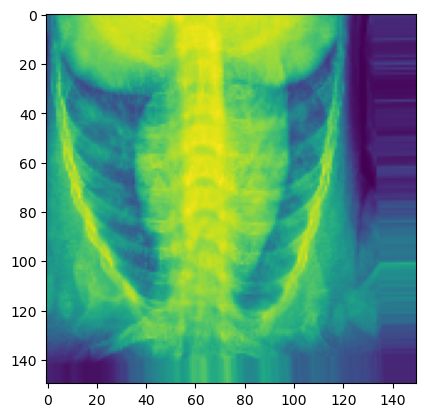

1.0


0.0


0.0


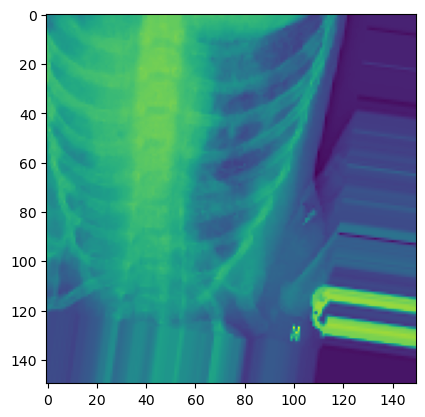

1.0


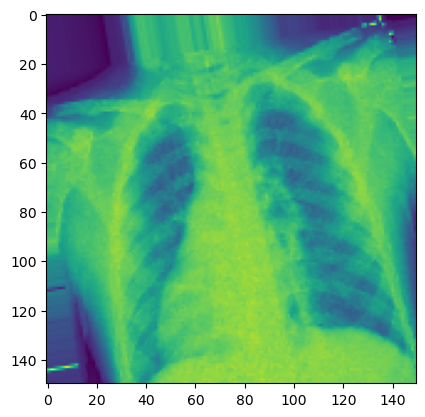

1.0


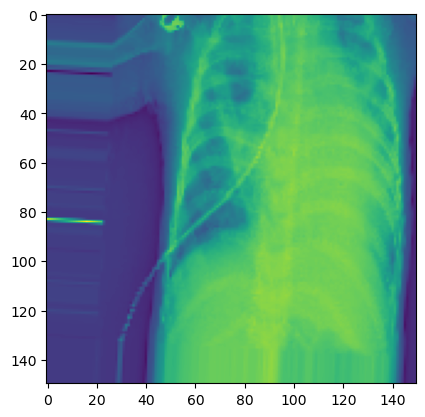

1.0


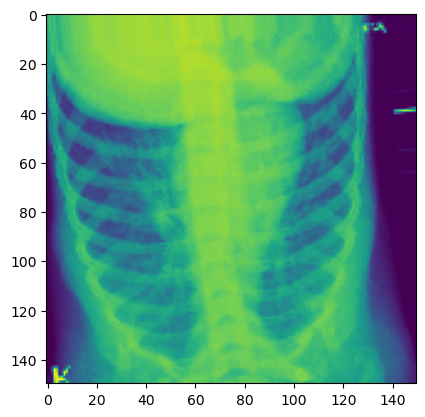

1.0


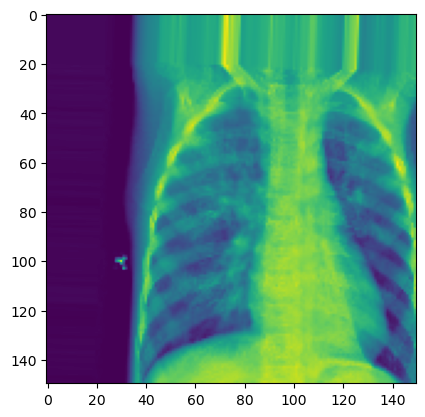

1.0


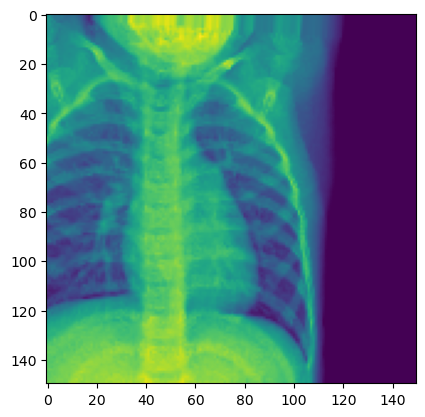

0.0


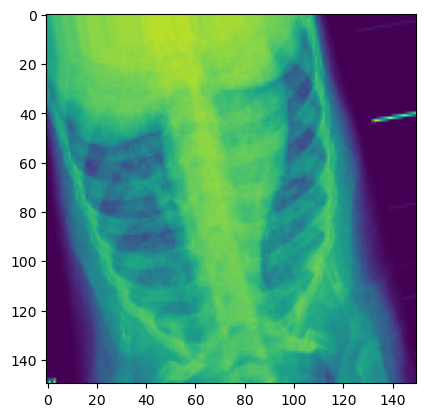

1.0


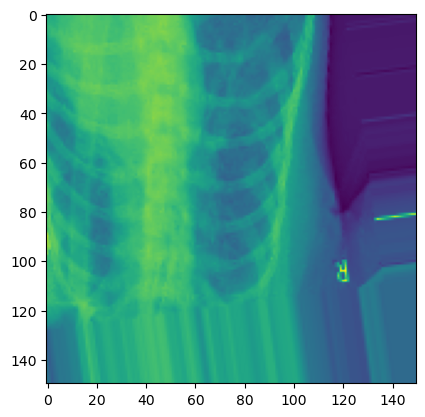

1.0


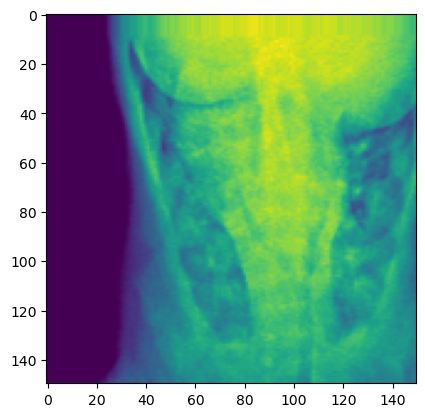

1.0


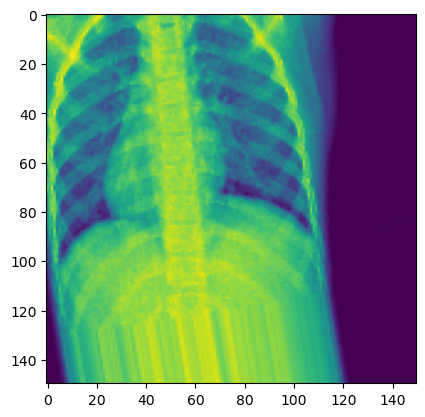

0.0


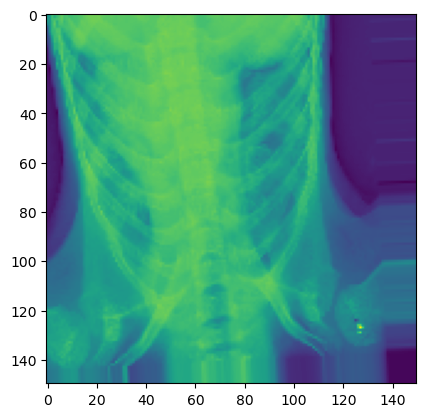

1.0


In [87]:
# read images from generator in batches, four in this case, and show them
for img_batch in augmented_train_generator:
    images = img_batch[0]
    labels = img_batch[1]
    for i in range(len(labels)):
        # Matches an image to its corresponding label
        plt.imshow(images[i])
        plt.show()
        print(labels[i])
    #break is added to read just a single batch    
    break

Visualization is showing the distortaion applied to the images after agumentation has been applied.

### Training the Model


#### Summary of Key Features in the Model Architecture

`Conv2D`: This allows us construct a convolutional layer with nodes and other features

`Dropout`: This feature was added to all layers. It helps to prevent overfitting by randomly dropping out nodes. This in turn forces the neural network to learn more groust features that will help it generalize well.

`Batch Normalization`: It is a scaling technique that will help the network acheive convergence

`MaxPooling2D`: This feature extracts the maximum value of the area it convolves 

`activation`: The activation function used was relu because it can allow the model account for non-linearities. It is also the most common and widely used activation function in deep learning models. The sigmoid activation was used in the output layer.

`loss`: Binary Cross Entropy is the accepted loss function for a Binary classification problem 

#### MODEL 01

This model has 3 hidden layers (with varying number of nodes for each hidden layer), a layer to flatten the input images from 150 x 150 to data the Machine Learning Model is used to and 2 out put layers because the output is binary.

In [91]:
cnn_model01 = Sequential()

cnn_model01.add(Conv2D(32, kernel_size=(3,3), activation="relu", strides =1, padding="same", input_shape=(height, width, 1)))
cnn_model01.add(Dropout(0.1))
cnn_model01.add(BatchNormalization())
cnn_model01.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))

cnn_model01.add(Conv2D(64, kernel_size=(3,3), activation="relu", strides=1, padding="same"))
cnn_model01.add(Dropout(0.2))
cnn_model01.add(BatchNormalization())
cnn_model01.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))

cnn_model01.add(Conv2D(128, kernel_size=(3,3), activation="relu", strides=1, padding="same"))
cnn_model01.add(Dropout(0.2))
cnn_model01.add(BatchNormalization())
cnn_model01.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))
          
#Flatten the output of the convolutional layers
cnn_model01.add(Flatten())

#Add dense layers
cnn_model01.add(Dense(128, activation="relu"))
cnn_model01.add(Dropout(0.2))
cnn_model01.add(Dense(1, activation="sigmoid"))

#Compile the model
cnn_model01.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Print out a summary of the network
#cnn_model01.summary()



In [268]:
learning_rate_decay =  ReduceLROnPlateau(monitor='val_accuracy', patience = 2,
                                             verbose=1,factor=0.3, min_lr=0.000001)

In [94]:
cnn_model_history01 = cnn_model01.fit(augmented_train_generator,
                                  epochs=15, validation_data=val_generator, callbacks=[learning_rate_decay])

Epoch 1/15
151/151 [==============================] - 99s 652ms/step - loss: 0.8556 - accuracy: 0.8237 - val_loss: 41.5461 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 2/15
151/151 [==============================] - 122s 803ms/step - loss: 0.2584 - accuracy: 0.8891 - val_loss: 24.7041 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 3/15
151/151 [==============================] - ETA: 0s - loss: 0.2359 - accuracy: 0.9065
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
151/151 [==============================] - 118s 780ms/step - loss: 0.2359 - accuracy: 0.9065 - val_loss: 20.9601 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/15
151/151 [==============================] - 125s 828ms/step - loss: 0.2044 - accuracy: 0.9158 - val_loss: 7.0437 - val_accuracy: 0.7381 - lr: 3.0000e-04
Epoch 5/15
151/151 [==============================] - 125s 823ms/step - loss: 0.1769 - accuracy: 0.9354 - val_loss: 1.2500 - val_accuracy: 0.7548 - lr: 3.0000e-04
Epoch 6/15
151/151 [==========

In [143]:
# creating a function to plot model history


def plot_training_summary(cnn_model_history):
    x = np.arange(1, 17, 1)
    plt.subplots(1,2, figsize=(12,4))
# plot train loss and validation loss from model history
    plt.subplot(1, 2, 1)
    plt.plot(cnn_model_history.history["loss"])
    plt.plot(cnn_model_history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train Loss", "Validation Loss"])
    
# plot train accuracy and validation accuracy from model history
    plt.subplot(1, 2, 2)
    plt.plot(cnn_model_history.history["accuracy"], color='green')
    plt.plot(cnn_model_history.history["val_accuracy"], color='red')
    plt.title("Training and Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Training Accuracy", "Validation Accuracy"],
          bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
    plt.xticks(x)
    plt.tight_layout()
    plt.show() 

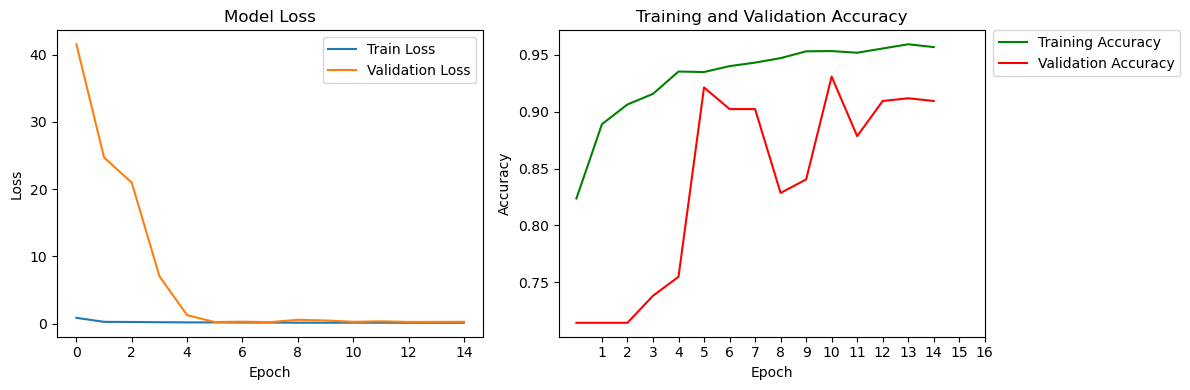

In [127]:
plot_training_summary(cnn_model_history01)

In [155]:
# Evaluate the model's performance on the test data
score = cnn_model01.evaluate(test_generator, verbose=1)

print("Test loss:", score[0])
print("Test accuracy:", score[1])



21/21 [==============================] - 4s 149ms/step - loss: 0.8264 - accuracy: 0.8212
Test loss: 0.8263525366783142
Test accuracy: 0.8211920261383057


#### Model Performance

The model converged fast, probably because of the Max pooling feature. After six Epochs, the model performance did not improve. The highest validation accuracy was at Epoch 11 at 93% accuracy and 95% for train accuracy at the same Epoch. Both train and valdation loss consistently fell during training. 

The loss function compares the target and predicted output values, it measures how well the network models the training data. We want to have a low loss. When the validation loss begins to increase, it is a sign that the network would begin to overfit even though there is a high Train score. But I did not selewct this model because when deployed on the test data, it had a high loss (0.8) which indicates that it would not perform well in predicting the classes.

The hyperparameters were adjusted e.g. I adjusted epoch and increased the patience, I also included earlystopping but the model performance did not improve.

Reduce Learning rate was applied to the model: This callback monitors a quantity (Validation accuracy) and if no improvement is seen the learning rate is reduced

#### MODEL 02

This model has a similar architecture with Model 1, except the strides feature which was taken out to observe the model's performance 

In [117]:
cnn_model02 = Sequential()

cnn_model02.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(height, width, 1)))
cnn_model02.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn_model02.add(Dropout(0.1))
cnn_model02.add(BatchNormalization())

cnn_model02.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
cnn_model02.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn_model02.add(Dropout(0.2))
cnn_model02.add(BatchNormalization())

cnn_model02.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
cnn_model02.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn_model02.add(Dropout(0.2))
cnn_model02.add(BatchNormalization())
          
#Flatten the output of the convolutional layers
cnn_model02.add(Flatten())

#Add dense layers
cnn_model02.add(Dense(128, activation="relu"))
cnn_model02.add(Dropout(0.2))
cnn_model02.add(Dense(1, activation="sigmoid"))

#Compile the model
cnn_model02.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Print out a summary of the network
#cnn_model02.summary()


In [118]:
cnn_model_history02 = cnn_model02.fit(augmented_train_generator,
                                  epochs=15, validation_data=val_generator, callbacks=[learning_rate_decay])

Epoch 1/15
151/151 [==============================] - 78s 509ms/step - loss: 0.5150 - accuracy: 0.7918 - val_loss: 20.8773 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 2/15
151/151 [==============================] - 89s 588ms/step - loss: 0.2827 - accuracy: 0.8812 - val_loss: 9.2000 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 3/15
151/151 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.8909
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
151/151 [==============================] - 94s 619ms/step - loss: 0.2648 - accuracy: 0.8909 - val_loss: 3.2792 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/15
151/151 [==============================] - 96s 636ms/step - loss: 0.2103 - accuracy: 0.9207 - val_loss: 0.5807 - val_accuracy: 0.8119 - lr: 3.0000e-04
Epoch 5/15
151/151 [==============================] - 98s 647ms/step - loss: 0.1907 - accuracy: 0.9224 - val_loss: 0.4639 - val_accuracy: 0.8476 - lr: 3.0000e-04
Epoch 6/15
151/151 [================

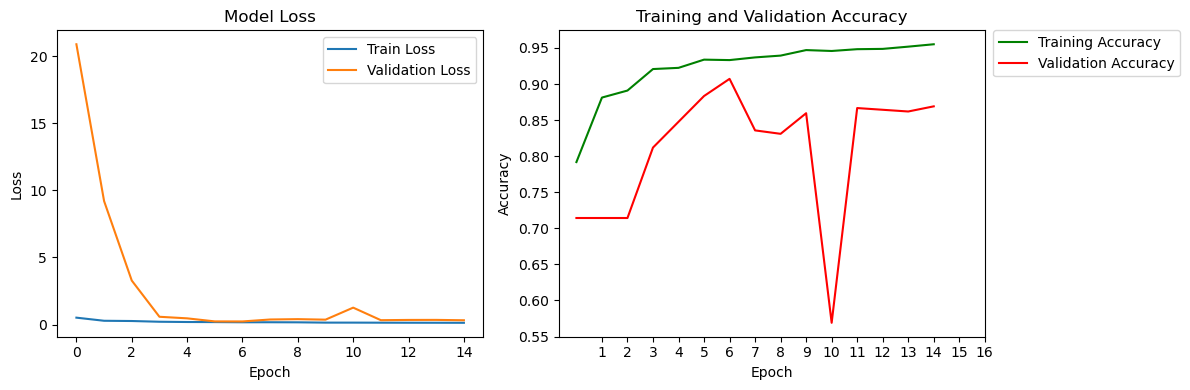

In [140]:
plot_training_summary(cnn_model_history02)

In [156]:
# Evaluate the model's performance on the test data
score02 = cnn_model02.evaluate(test_generator, verbose=1)

print("Test loss:", score02[0])
print("Test accuracy:", score02[1])

21/21 [==============================] - 3s 143ms/step - loss: 0.4168 - accuracy: 0.8493
Test loss: 0.4168171286582947
Test accuracy: 0.8493377566337585


This model had a lower loss than the first model, which means it performed better on the test set.

#### MODEL 03

In [107]:
cnn_model03 = Sequential()

cnn_model03.add(Conv2D(32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(height, width, 1)))
cnn_model03.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn_model03.add(Dropout(0.2))
cnn_model03.add(BatchNormalization())

cnn_model03.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
cnn_model03.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn_model03.add(Dropout(0.2))
cnn_model03.add(BatchNormalization())

cnn_model03.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"))
cnn_model03.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn_model03.add(Dropout(0.2))
cnn_model03.add(BatchNormalization())

cnn_model03.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"))
cnn_model03.add(MaxPooling2D(pool_size=(2,2), padding="same"))
cnn_model03.add(Dropout(0.2))
cnn_model03.add(BatchNormalization())
          
#Flatten the output of the convolutional layers
cnn_model03.add(Flatten())

#Add dense layers
cnn_model03.add(Dense(64, activation="relu"))
cnn_model03.add(Dropout(0.2))
cnn_model03.add(Dense(1, activation="sigmoid"))

#Compile the model
cnn_model03.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Print out a summary of the network
#cnn_model03.summary()

In [141]:
plot_training_summary(cnn_model_history03)

In [108]:
cnn_model_history03 = cnn_model03.fit(augmented_train_generator,
                                  epochs=15, validation_data=val_generator, callbacks=[learning_rate_decay])

Epoch 1/15
151/151 [==============================] - 73s 477ms/step - loss: 0.3701 - accuracy: 0.8363 - val_loss: 3.2826 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 2/15
151/151 [==============================] - 84s 552ms/step - loss: 0.2580 - accuracy: 0.8955 - val_loss: 2.1975 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 3/15
151/151 [==============================] - ETA: 0s - loss: 0.2369 - accuracy: 0.9091
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
151/151 [==============================] - 85s 563ms/step - loss: 0.2369 - accuracy: 0.9091 - val_loss: 2.8492 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/15
151/151 [==============================] - 87s 573ms/step - loss: 0.1848 - accuracy: 0.9276 - val_loss: 1.9535 - val_accuracy: 0.7143 - lr: 3.0000e-04
Epoch 5/15
151/151 [==============================] - 91s 602ms/step - loss: 0.1783 - accuracy: 0.9319 - val_loss: 0.3945 - val_accuracy: 0.8214 - lr: 3.0000e-04
Epoch 6/15
151/151 [=================

In [157]:
# Evaluate the model's performance on the test data
score03 = cnn_model03.evaluate(test_generator, verbose=1)

print("Test loss:", score03[0])
print("Test accuracy:", score03[1])

21/21 [==============================] - 3s 139ms/step - loss: 0.8310 - accuracy: 0.6854
Test loss: 0.8309849500656128
Test accuracy: 0.6854304671287537


An additional hidden layer was introduced to improve the model's performance, but the model performed poorly on the test set and also had a high test loss

#### MODEL 04

In [264]:
cnn_model04 = Sequential()

cnn_model04.add(Conv2D(32, kernel_size=(3,3), activation="relu", strides =1, padding="same", input_shape=(height, width, 1)))
cnn_model04.add(BatchNormalization())
cnn_model04.add(MaxPooling2D(pool_size=(2,2), strides =2, padding="same"))

cnn_model04.add(Conv2D(64, kernel_size=(3,3), activation="relu", strides=1, padding="same"))
cnn_model04.add(Dropout(0.1))
cnn_model04.add(BatchNormalization())
cnn_model04.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=2))

cnn_model04.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="same", strides=1))
cnn_model04.add(Dropout(0.2))
cnn_model04.add(BatchNormalization())
cnn_model04.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=2))

cnn_model04.add(Conv2D(128, kernel_size=(3,3), activation="relu", padding="same", strides=1))
cnn_model04.add(Dropout(0.2))
cnn_model04.add(BatchNormalization())
cnn_model04.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=2))

cnn_model04.add(Conv2D(256, kernel_size=(3,3), activation="relu", padding="same", strides=1))
cnn_model04.add(Dropout(0.2))
cnn_model04.add(BatchNormalization())
cnn_model04.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=2))
          
#Flatten the output of the convolutional layers
cnn_model04.add(Flatten())

#Add dense layers
cnn_model04.add(Dense(128, activation="relu"))
cnn_model04.add(Dropout(0.2))
cnn_model04.add(Dense(1, activation="sigmoid"))

#Compile the model
cnn_model04.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

#Print out a summary of the network
#cnn_model04.summary()

In [265]:
cnn_model_history04 = cnn_model04.fit(augmented_train_generator,
                                  epochs=15, validation_data=val_generator, callbacks=[learning_rate_decay])

Epoch 1/15
151/151 [==============================] - 103s 677ms/step - loss: 0.3940 - accuracy: 0.8613 - val_loss: 5.2199 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 2/15
151/151 [==============================] - 115s 760ms/step - loss: 0.2152 - accuracy: 0.9151 - val_loss: 7.9332 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 3/15
151/151 [==============================] - ETA: 0s - loss: 0.1861 - accuracy: 0.9278
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
151/151 [==============================] - 128s 849ms/step - loss: 0.1861 - accuracy: 0.9278 - val_loss: 7.3900 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/15
151/151 [==============================] - 126s 830ms/step - loss: 0.1464 - accuracy: 0.9466 - val_loss: 2.7150 - val_accuracy: 0.7167 - lr: 3.0000e-04
Epoch 5/15
151/151 [==============================] - 127s 840ms/step - loss: 0.1313 - accuracy: 0.9495 - val_loss: 2.1862 - val_accuracy: 0.7238 - lr: 3.0000e-04
Epoch 6/15
151/151 [============

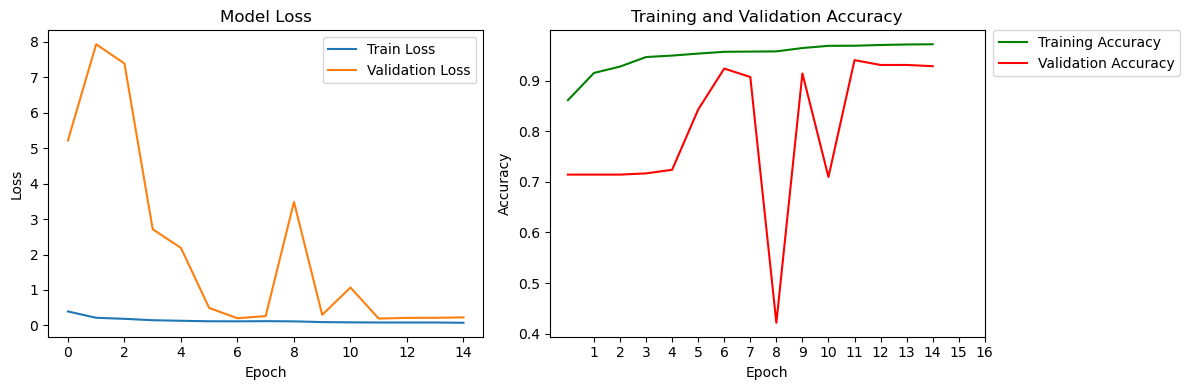

In [266]:
plot_training_summary(cnn_model_history04)

In [267]:
# Evaluate the model's performance on the test data
score04 = cnn_model04.evaluate(test_generator, verbose=1)

print("Test loss:", score04[0])
print("Test accuracy:", score04[1])

21/21 [==============================] - 4s 154ms/step - loss: 0.5407 - accuracy: 0.8576
Test loss: 0.5406701564788818
Test accuracy: 0.8576158881187439


This model was the second best is performance behind [model 2](#MODEL-02). Other models were trained with varying parameters such as adjusting batch size and implenenting early stopping. 

The best model trained was model [model 2](#MODEL-02) and it will be used to predict the test data

|**Model**|**Test loss**  |**Test accuracy** 
|-------|-----------|------|
|Model 1|0.826      |0.821 |
|Model 2|0.414      |0.849 |
|Model 3|0.830      |0.685 |  
|Model 4|0.540      |0.857 |

### Model Prediction & Evaulation

The trained model was used to make predictions on the images in the test set. The prediction will aim to correctly match an image to its correct label. Since this would be difficult to understand because it will be a bunch of numbers a confusion matrix will be created to help evaluate the model's performance. 

In [2]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# predictions are rounded up and conveerted to integers
predictions = cnn_model02.predict(test_generator)
predictions = np.round(predictions).astype(int)
#predictions

NameError: name 'cnn_model02' is not defined

In [282]:
# returns array that has all corresponding labels for each image in the test set 
#test_generator.classes


In [195]:
#code to get the classes/label of the images 
y_true=test_generator.classes

In [193]:
test_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [196]:
print(classification_report(y_true, predictions, target_names = ['Normal (Class 0)','Pneumonia (Class 1)']))

                     precision    recall  f1-score   support

   Normal (Class 0)       0.81      0.75      0.78       214
Pneumonia (Class 1)       0.87      0.91      0.89       390

           accuracy                           0.85       604
          macro avg       0.84      0.83      0.83       604
       weighted avg       0.85      0.85      0.85       604



The classification report displays the precision, recall, F1 and support scores

It is a way to check how the model performed in prediction. Precision is the accuracy of positive predictions, how many predictions the model got right out of all predictions made

The model predicted a normal X-ray image 81% of the time and a Pneumonia X-ray image 87% of the time.

recall has to do with the truth. It tells us the percentage of positive cases that were correctly identified. The model correctly identified a normal X-ray 75% of the time and a Pneumonia image 91% of the time.

The F1 is a weighted average of precision and recall, with the best score being 1.0 and the worst 0.0. The model has a F1 score of 0.83.

The support is the number of actual occurrences of the class in the dataset. The test dataset has 214 occurrences of Normal images and 390 Pneumonia images.


### Confusion Matrix

In [226]:
# code to show to confusion matrix 
cm = confusion_matrix(y_true, predictions, labels=[0,1])
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[160  54]
 [ 37 353]]


In [228]:
# summing up the top and bottom rows
print(np.sum(cm, axis=1).reshape(-1,1))

[[214]
 [390]]


In [232]:
# code to create a normalized confusion matrix
print(np.round(cm/np.sum(cm, axis=1).reshape(-1,1), 2))

[[0.75 0.25]
 [0.09 0.91]]


In [220]:
test_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

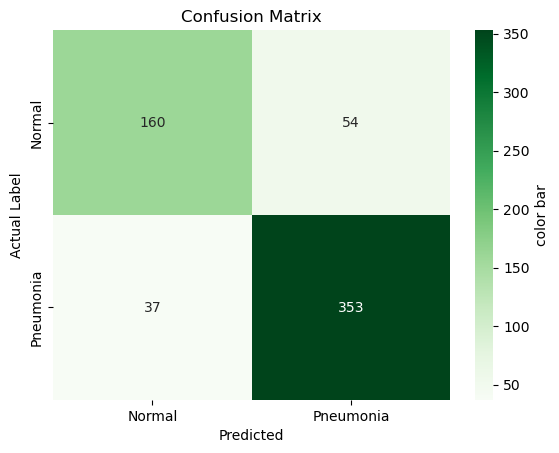

In [283]:
# plotting the confusion matrix on a heatmap in seaborn
sns.heatmap(cm, cmap="Greens", annot=True, fmt=".3g", cbar_kws={"orientation":"vertical","label":"color bar"},
                                                    xticklabels=["Normal","Pneumonia"], yticklabels=["Normal","Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

From the confusion matrix, the model predicted a normal image as normal 160 times(True Negative) and misidentified a normal image as pneumonia 54 times (False positive)

The model incorrectly predicted a pneumonia image as normal 37 times (False Negative) and correctly identified a pneumonia image as pneumonia 353 times (True positive).

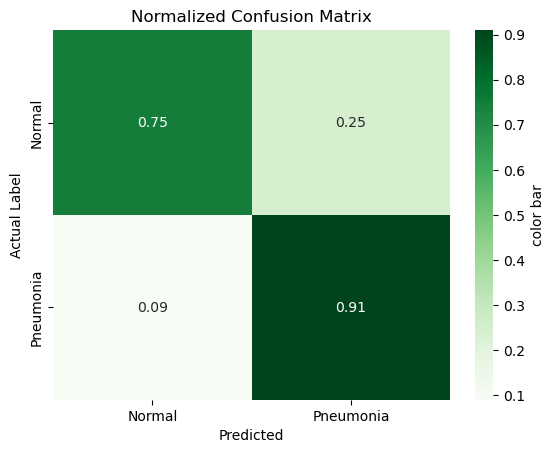

In [284]:
#Normalized confusion matrix
sns.heatmap(cm_normalized, cmap="Greens", annot=True, cbar_kws={"orientation":"vertical","label":"color bar"},
                                                    xticklabels=["Normal","Pneumonia"], yticklabels=["Normal","Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("Actual Label")
plt.title("Normalized Confusion Matrix")
plt.show()

### Conclusion & Findings



In conclusion, the model had an overall accuracy of 85%, however it can still be imporved to increase its prediction of normal images. The model performed better in identifying positive cases of pneumonia than in identifying normal images, while this is good because it means that the disease can be detected and treated the model would need to be improved to identify normal X-ray images too.

The performance of the model can be attributed to the number of images in the train dataset: there were more pneumonia images than normal images in the dataset so the model performed better at identifying images positive for pneumonia.


### Future Directions

1. Improve the model's perfomrance in identifying normal images by increasing the number of normal images in the train dataset. And also improving the model's overall accuracy.

2. Predict the images on a pre-trained model and test its performance against my model

3. Identify what areas of the images are used to make predict using Gradcam
